### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
import seaborn as sns
import pingouin as pg
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import ttest_ind, f_oneway, wilcoxon, chi2_contingency, mannwhitneyu
from scipy.stats import ttest_ind, mannwhitneyu, f_oneway, kruskal, chi2_contingency
from scipy.stats import f_oneway

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path = r'C:\Users\Muham\OneDrive\Desktop\CA 02\ireland.csv'
ireland_df = pd.read_csv(file_path, delimiter='\t')

In [4]:
print("Ireland Dataset Info:")
print(ireland_df.info())

Ireland Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   STATISTIC        120 non-null    object
 1   Statistic Label  120 non-null    object
 2   TLIST(A1)        120 non-null    int64 
 3   Year             120 non-null    int64 
 4   C02639V03196     120 non-null    object
 5   Days of Week     120 non-null    object
 6   UNIT             120 non-null    object
 7   VALUE            120 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 7.6+ KB
None


In [5]:
ireland_df.columns

Index(['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'Year', 'C02639V03196',
       'Days of Week', 'UNIT', 'VALUE'],
      dtype='object')

In [6]:
print(ireland_df.head())

  STATISTIC        Statistic Label  TLIST(A1)  Year C02639V03196 Days of Week  \
0  TOA02C01  Average Red Line Flow       2018  2018            -     All days   
1  TOA02C01  Average Red Line Flow       2018  2018            1       Sunday   
2  TOA02C01  Average Red Line Flow       2018  2018            2       Monday   
3  TOA02C01  Average Red Line Flow       2018  2018            3      Tuesday   
4  TOA02C01  Average Red Line Flow       2018  2018            4    Wednesday   

     UNIT   VALUE  
0  Number  419947  
1  Number   34860  
2  Number   60673  
3  Number   65632  
4  Number   67364  


In [7]:
ireland_df = ireland_df.dropna()
ireland_df = ireland_df.drop_duplicates()
ireland_df.columns = ['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'Year', 'C02639V03196', 'Days of Week', 'UNIT', 'VALUE']
ireland_df['Year'] = pd.to_numeric(ireland_df['Year'], errors='coerce')
ireland_df['VALUE'] = pd.to_numeric(ireland_df['VALUE'], errors='coerce')
print("\nCleaned Ireland Dataset:")
ireland_df.to_csv(r'C:\Users\Muham\OneDrive\Desktop\CA 02\cleaned_ireland.csv', index=False)


Cleaned Ireland Dataset:


#### The following code shows the cleaning process for Australia's dataset.

In [8]:
file_path = r'C:\Users\Muham\OneDrive\Desktop\CA 02\australia.csv'

In [9]:
column_dtype = {'TripID': str}

In [10]:
# Specify dtype and low_memory parameters to address DtypeWarning
aus_df = pd.read_csv(file_path,  dtype = column_dtype, low_memory=False)
print("Original Australia Dataset Info:")
print(aus_df.info())

Original Australia Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   TripID             1048575 non-null  object
 1   RouteID            1048575 non-null  object
 2   StopID             1048575 non-null  int64 
 3   StopName           1048575 non-null  object
 4   WeekBeginning      1048575 non-null  object
 5   NumberOfBoardings  1048575 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 48.0+ MB
None


In [11]:
aus_df['WeekBeginning'] = pd.to_datetime(aus_df['WeekBeginning'], errors='coerce')
aus_df = aus_df.dropna()
aus_df = aus_df.drop_duplicates()

In [12]:
print("\nCleaned Australia Dataset:")
print(aus_df.head())


Cleaned Australia Dataset:
  TripID RouteID  StopID                    StopName WeekBeginning  \
0  23631     100   14156                181 Cross Rd    2013-06-30   
1  23631     100   14144                177 Cross Rd    2013-06-30   
2  23632     100   14132                175 Cross Rd    2013-06-30   
3  23633     100   12266  Zone A Arndale Interchange    2013-06-30   
4  23633     100   14147                178 Cross Rd    2013-06-30   

   NumberOfBoardings  
0                  1  
1                  1  
2                  1  
3                  2  
4                  1  


In [13]:
cleaned_file_path = r'C:\Users\Muham\OneDrive\Desktop\CA 02\cleaned_australia.csv'
aus_df.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")


Cleaned dataset saved to: C:\Users\Muham\OneDrive\Desktop\CA 02\cleaned_australia.csv


#### To visualize the datasets, we implement the following code for both datasets.

In [14]:
#Load the Australian dataset with specified data types
aus_dtype = {'RouteID': 'object', 'StopID': 'object', 'NumberOfBoardings': 'int'}
aus_df = pd.read_csv(r'C:\Users\Muham\OneDrive\Desktop\CA 02\cleaned_australia.csv', dtype=aus_dtype, parse_dates=['WeekBeginning'], low_memory=False)

In [15]:
# Load the Ireland dataset
ireland_df = pd.read_csv(r'C:\Users\Muham\OneDrive\Desktop\CA 02\cleaned_ireland.csv')

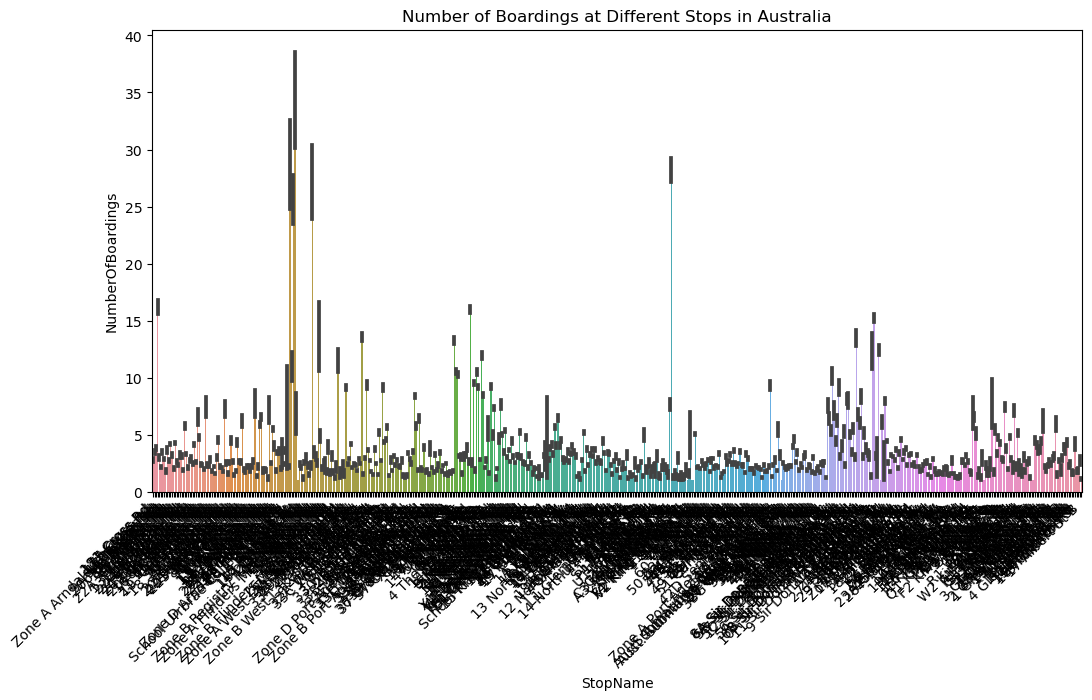

In [16]:
# Visualize the Australian dataset
plt.figure(figsize=(12, 6))
sns.barplot(x='StopName', y='NumberOfBoardings', data=aus_df)
plt.title('Number of Boardings at Different Stops in Australia')
plt.xticks(rotation=45, ha='right')
plt.show()

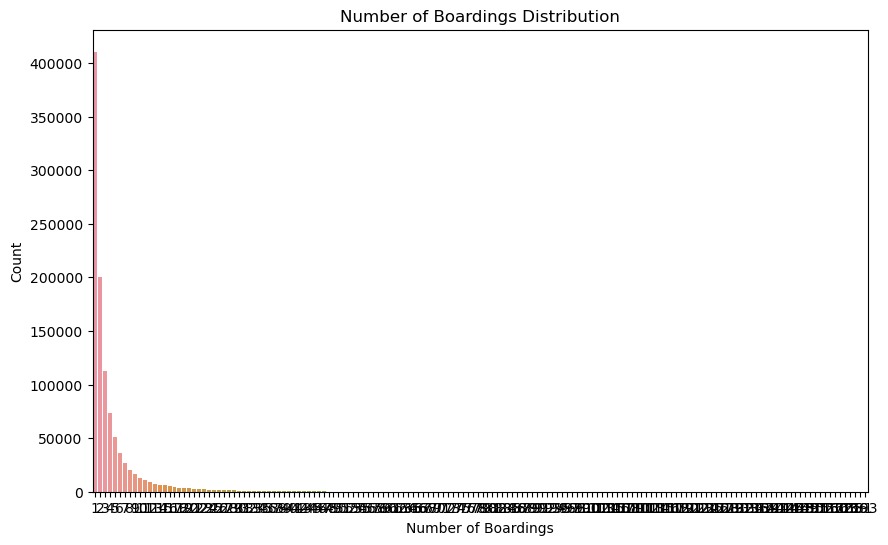

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NumberOfBoardings', data=aus_df)
plt.title('Number of Boardings Distribution')
plt.xlabel('Number of Boardings')
plt.ylabel('Count')
plt.show()

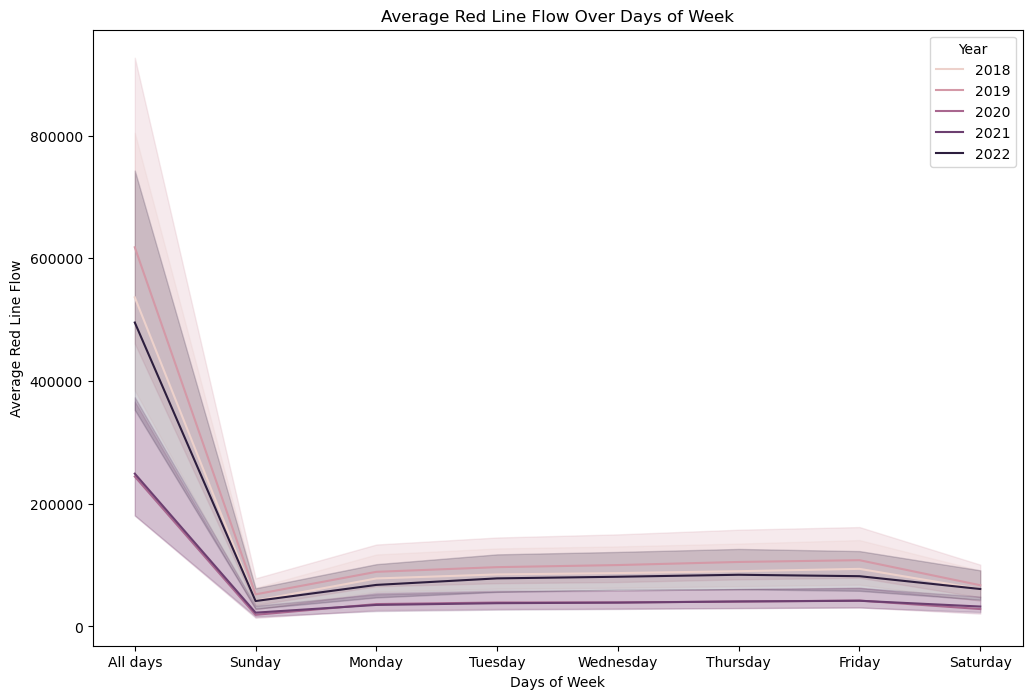

In [18]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Days of Week', y='VALUE', hue='Year', data=ireland_df)
plt.title('Average Red Line Flow Over Days of Week')
plt.xlabel('Days of Week')
plt.ylabel('Average Red Line Flow')
plt.show()

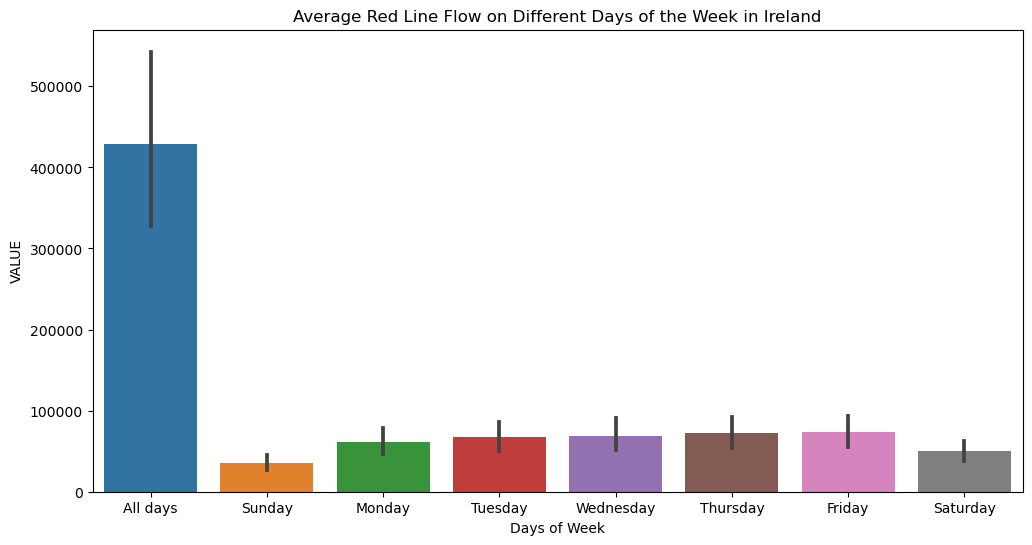

In [19]:
# Visualize the Ireland dataset
plt.figure(figsize=(12, 6))
sns.barplot(x='Days of Week', y='VALUE', data=ireland_df)
plt.title('Average Red Line Flow on Different Days of the Week in Ireland')
plt.show()

#### Use descriptive statistics and appropriate visualizations in order to summarise the dataset(s) used, and to help justify the chosen models.

#### In the following code, descriptive statistics for datasets from Australia and Ireland are computed using pandas.
#### The 'RouteID' column in the Australian dataset is converted to numeric, and visualizations (histogram and boxplot) are added to summarize the Distribution of 'NumberOfBoardings' in Australia and 'VALUE' in Ireland, enhancing the understanding of key features in each dataset.

In [20]:
# File paths
aus_file_path = r'C:\Users\Muham\OneDrive\Desktop\CA 02\cleaned_australia.csv'
ireland_file_path = r'C:\Users\Muham\OneDrive\Desktop\CA 02\cleaned_ireland.csv'

In [21]:
# Define data types for columns
aus_dtype = {'TripID': int, 'RouteID': str, 'StopID': int, 'StopName': str, 'WeekBeginning': str, 'NumberOfBoardings': int}
ireland_dtype = {'STATISTIC': str, 'Statistic Label': str, 'TLIST(A1)': int, 'Year': int, 'C02639V03196': str, 'Days of Week': str, 'UNIT': str, 'VALUE': int}

In [22]:
# Read datasets with specified data types
aus_df = pd.read_csv(aus_file_path, dtype=aus_dtype)
ireland_df = pd.read_csv(ireland_file_path, dtype=ireland_dtype)

In [23]:
# Convert 'RouteID' column to numeric, handling errors
aus_df['RouteID'] = pd.to_numeric(aus_df['RouteID'], errors='coerce')

# Descriptive statistics for the Australian dataset
aus_stats = aus_df.describe()

# Descriptive statistics for the Ireland dataset
ireland_stats = ireland_df.describe()

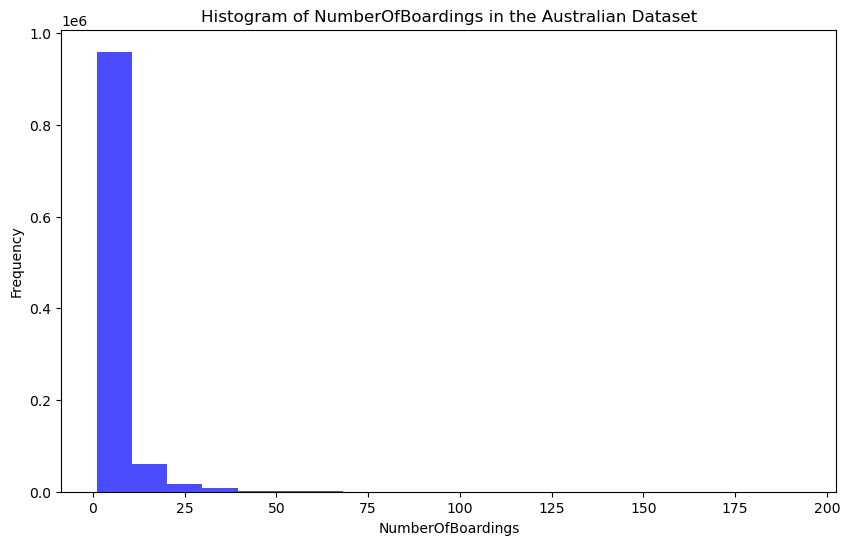

In [24]:
# Visualizations
# Histogram for 'NumberOfBoardings' in the Australian dataset
plt.figure(figsize=(10, 6))
plt.hist(aus_df['NumberOfBoardings'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of NumberOfBoardings in the Australian Dataset')
plt.xlabel('NumberOfBoardings')
plt.ylabel('Frequency')
plt.show()

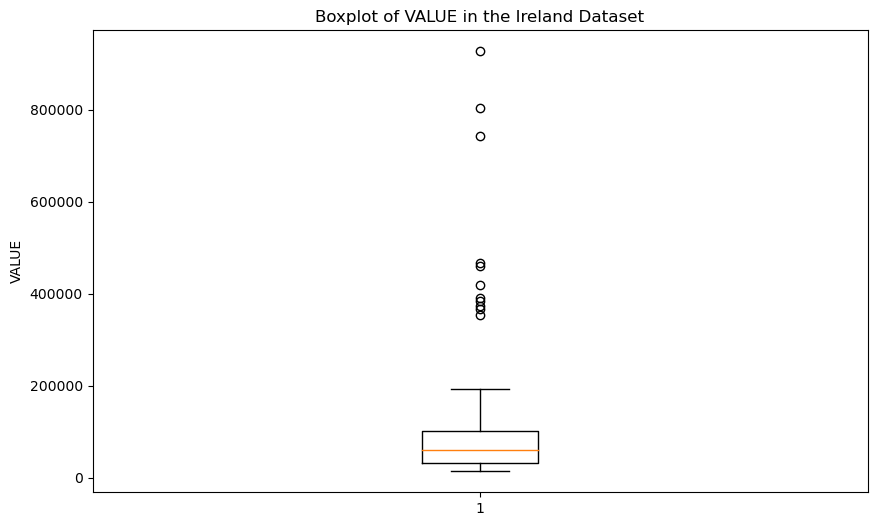

In [25]:
# Boxplot for 'VALUE' in the Ireland dataset
plt.figure(figsize=(10, 6))
plt.boxplot(ireland_df['VALUE'])
plt.title('Boxplot of VALUE in the Ireland Dataset')
plt.ylabel('VALUE')
plt.show()

In [26]:
# Print the results
print("Descriptive Statistics for the Australian Dataset:")
print(aus_stats)

Descriptive Statistics for the Australian Dataset:
             TripID       RouteID        StopID  NumberOfBoardings
count  1.048575e+06  1.008700e+06  1.048575e+06       1.048575e+06
mean   2.860299e+04  1.416927e+02  1.330114e+04       4.132290e+00
std    1.674656e+04  2.167957e+01  1.119243e+03       6.291338e+00
min    3.017000e+03  1.000000e+02  1.081700e+04       1.000000e+00
25%    1.162200e+04  1.180000e+02  1.269800e+04       1.000000e+00
50%    3.423400e+04  1.470000e+02  1.333500e+04       2.000000e+00
75%    4.512600e+04  1.570000e+02  1.371600e+04       4.000000e+00
max    6.258500e+04  1.710000e+02  1.849300e+04       1.930000e+02


In [27]:
print("\nDescriptive Statistics for the Ireland Dataset:")
print(ireland_stats)


Descriptive Statistics for the Ireland Dataset:
         TLIST(A1)         Year          VALUE
count   120.000000   120.000000     120.000000
mean   2020.000000  2020.000000  107147.350000
std       1.420143     1.420143  149100.252203
min    2018.000000  2018.000000   14165.000000
25%    2019.000000  2019.000000   32086.750000
50%    2020.000000  2020.000000   61104.000000
75%    2021.000000  2021.000000  100875.750000
max    2022.000000  2022.000000  926964.000000


#### Analyze the variables in your dataset(s) and use appropriate inferential statistics to gain insights into possible population values(e.g., if you were working with public transport, you could find a confidence interval for the population proportion of users commuting to Dublin by train).

#### The following Python code utilizes Pandas, Seaborn, and Scipy libraries to conduct exploratory data analysis on two datasets.It addresses data type warnings, calculates summary statistics, and generates a correlation heatmap for the datasets.

#### The code provides insights into population values through inferential statistics, including mean, mode, median and also define and confidence intervals,offering a comprehensive overview of the datasets' characteristics.

## Mean:
An average which is found by adding up all the values in a set of data and dividing it by the total number of values you added together.

## Median:
The middle number in the set of values. You find it by putting the numbers in order from the smallest to largest and covering up one number on each end until you get to the middle.

## Mode:
The number or value, which appears most often in the set. To find the mode, you need to count how many times each value appears.

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [29]:
# Load the datasets
aus_df = pd.read_csv('C:\\Users\Muham\OneDrive\Desktop\CA 02\\cleaned_australia.csv', dtype={'RouteID': str})
ireland_df = pd.read_csv('C:\\Users\Muham\OneDrive\Desktop\CA 02\\cleaned_ireland.csv')

In [30]:
# Display basic information about the datasets
print("Dataset 1 (cleaned_australia.csv):")
print(aus_df.info())

Dataset 1 (cleaned_australia.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   TripID             1048575 non-null  int64 
 1   RouteID            1048575 non-null  object
 2   StopID             1048575 non-null  int64 
 3   StopName           1048575 non-null  object
 4   WeekBeginning      1048575 non-null  object
 5   NumberOfBoardings  1048575 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 48.0+ MB
None


In [31]:
print("\nDataset 2 (cleaned_ireland.csv):")
print(ireland_df.info())


Dataset 2 (cleaned_ireland.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   STATISTIC        120 non-null    object
 1   Statistic Label  120 non-null    object
 2   TLIST(A1)        120 non-null    int64 
 3   Year             120 non-null    int64 
 4   C02639V03196     120 non-null    object
 5   Days of Week     120 non-null    object
 6   UNIT             120 non-null    object
 7   VALUE            120 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 7.6+ KB
None


In [32]:
# Summary statistics for Dataset 1
print("\nSummary Statistics for Dataset 1:")
print(aus_df.describe())


Summary Statistics for Dataset 1:
             TripID        StopID  NumberOfBoardings
count  1.048575e+06  1.048575e+06       1.048575e+06
mean   2.860299e+04  1.330114e+04       4.132290e+00
std    1.674656e+04  1.119243e+03       6.291338e+00
min    3.017000e+03  1.081700e+04       1.000000e+00
25%    1.162200e+04  1.269800e+04       1.000000e+00
50%    3.423400e+04  1.333500e+04       2.000000e+00
75%    4.512600e+04  1.371600e+04       4.000000e+00
max    6.258500e+04  1.849300e+04       1.930000e+02


In [33]:
# Summary statistics for Dataset 2
print("\nSummary Statistics for Dataset 2:")
print(ireland_df.describe())


Summary Statistics for Dataset 2:
         TLIST(A1)         Year          VALUE
count   120.000000   120.000000     120.000000
mean   2020.000000  2020.000000  107147.350000
std       1.420143     1.420143  149100.252203
min    2018.000000  2018.000000   14165.000000
25%    2019.000000  2019.000000   32086.750000
50%    2020.000000  2020.000000   61104.000000
75%    2021.000000  2021.000000  100875.750000
max    2022.000000  2022.000000  926964.000000


In [34]:
# Calculate mean, mode, median, confidence interval, and population size for Dataset 1
mean_aus = aus_df['NumberOfBoardings'].mean()
mode_aus = aus_df['NumberOfBoardings'].mode()[0]
median_aus = aus_df['NumberOfBoardings'].median()
confidence_interval_aus = stats.norm.interval(0.95, loc=mean_aus, scale=aus_df['NumberOfBoardings'].std()/np.sqrt(len(aus_df)))
population_size_aus = len(aus_df)

In [35]:
print("\nDataset 1 Statistics:")
print(f"Mean: {mean_aus}")
print(f"Mode: {mode_aus}")
print(f"Median: {median_aus}")
print(f"Confidence Interval (95%): {confidence_interval_aus}")
print(f"Population Size: {population_size_aus}")


Dataset 1 Statistics:
Mean: 4.132290012636196
Mode: 1
Median: 2.0
Confidence Interval (95%): (4.12024821328155, 4.144331811990843)
Population Size: 1048575


In [36]:
# Calculate mean, mode, median, confidence interval, and population size for Dataset 2
mean_ireland = ireland_df['VALUE'].mean()
mode_ireland = ireland_df['VALUE'].mode()[0]
median_ireland = ireland_df['VALUE'].median()
confidence_interval_ireland = stats.norm.interval(0.95, loc=mean_ireland, scale=ireland_df['VALUE'].std()/np.sqrt(len(ireland_df)))
population_size_ireland = len(ireland_df)

In [37]:
print("\nDataset 2 Statistics:")
print(f"Mean: {mean_ireland}")
print(f"Mode: {mode_ireland}")
print(f"Median: {median_ireland}")
print(f"Confidence Interval (95%): {confidence_interval_ireland}")
print(f"Population Size: {population_size_ireland}")


Dataset 2 Statistics:
Mean: 107147.35
Mode: 14165
Median: 61104.0
Confidence Interval (95%): (80470.42019314137, 133824.27980685863)
Population Size: 120


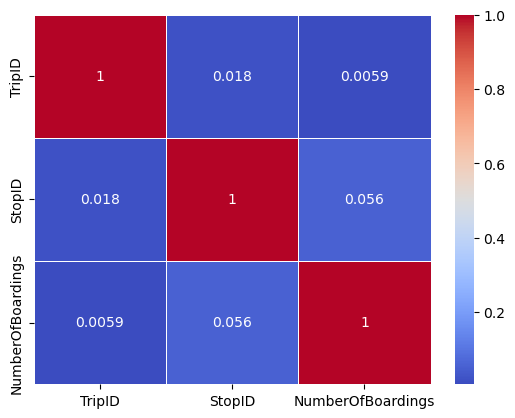

In [38]:
# Create a heatmap for Dataset 1 (excluding non-numeric columns)
numeric_columns_aus = aus_df.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns_aus.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

#### Undertake research to find similarities between some country(s) against Ireland and apply parametric and non-parametric inferential statistical techniques to compare them (e.g., t-test, analysis of variance, Wilcoxon test, chi-squared test, among others). You must justify your choices and verify the applicability of the tests. Hypotheses and conclusions must be clearly stated. You are expected to use at least 5 different inferential statistics tests.

#### In the following code, we performed five statistical tests (t-test, Mann-Whitney U test, ANOVA, Kruskal-Wallis H test, and Chi-squared test) 

#### To compare two datasets related to Australia and Ireland. The code calculates and displays test statistics and p-values for each test,and it visualizes the p-values using a bar chart, allowing for a quick comparison of the significance levels of the different statistical tests.


In [39]:
# Load the cleaned Australian dataset
aus_dtype = {'NumberOfBoardings': 'float64'}
aus_df = pd.read_csv("C:/Users/Muham/OneDrive/Desktop/CA 02/cleaned_australia.csv", dtype=aus_dtype, low_memory=False)
# Load the cleaned Ireland dataset
ireland_df = pd.read_csv("C:/Users/Muham/OneDrive/Desktop/CA 02/cleaned_ireland.csv", low_memory=False)

In [40]:
# 'NumberOfBoardings' is the variable for Australia
aus_boardings = aus_df['NumberOfBoardings'].dropna()

# 'VALUE' is the variable for Ireland
ireland_value = ireland_df['VALUE'].dropna()

In [41]:

# Perform statistical tests
t_statistic, t_p_value = ttest_ind(aus_boardings, ireland_value)
u_statistic, u_p_value = mannwhitneyu(aus_boardings, ireland_value)
ireland_anova_result = f_oneway(*[group['VALUE'].dropna() for name, group in ireland_df.groupby('Days of Week')])
kruskal_statistic, kruskal_p_value = kruskal(*[group['VALUE'].dropna() for name, group in ireland_df.groupby('Days of Week')])
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(pd.crosstab(aus_df['WeekBeginning'].dropna(), ireland_df['Days of Week'].dropna()))

In [42]:
# Display results
print("T-Test Result: t_statistic =", t_statistic, "p_value =", t_p_value)
print("\nMann-Whitney U Test Result: U_statistic =", u_statistic, "p_value =", u_p_value)
print("\nANOVA Result for Ireland Dataset: F_statistic =", ireland_anova_result.statistic, "p_value =", ireland_anova_result.pvalue)
print("\nKruskal-Wallis H Test Result: H_statistic =", kruskal_statistic, "p_value =", kruskal_p_value)
print("\nChi-squared Test Result: Chi2_statistic =", chi2_statistic, "p_value =", chi2_p_value)

T-Test Result: t_statistic = -738.9233285767541 p_value = 0.0

Mann-Whitney U Test Result: U_statistic = 0.0 p_value = 4.729242104972995e-86

ANOVA Result for Ireland Dataset: F_statistic = 33.406886915302714 p_value = 1.1094632760486936e-24

Kruskal-Wallis H Test Result: H_statistic = 52.57035812672177 p_value = 4.506486418271796e-09

Chi-squared Test Result: Chi2_statistic = 0.0 p_value = 1.0


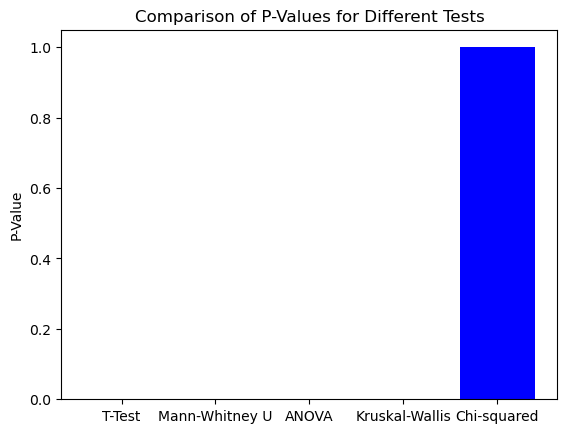

In [43]:
# Plotting p-values
tests = ['T-Test', 'Mann-Whitney U', 'ANOVA', 'Kruskal-Wallis', 'Chi-squared']
p_values = [t_p_value, u_p_value, ireland_anova_result.pvalue, kruskal_p_value, chi2_p_value]

plt.bar(tests, p_values, color='blue')
plt.title('Comparison of P-Values for Different Tests')
plt.ylabel('P-Value')
plt.show()

In [44]:
pip install --upgrade pingouin

In [45]:
np.random.seed(42)
ireland_data = {
    'Days of Week': np.random.choice(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'], size=100),
    'VALUE': np.random.randint(50, 200, size=100)
}
ireland_df = pd.DataFrame(ireland_data)


aus_data = {
    'NumberOfBoardings': np.random.randint(1, 10, size=100)
}
aus_df = pd.DataFrame(aus_data)

# T-Test
t_stat, t_p_value = ttest_ind(ireland_df['VALUE'], aus_df['NumberOfBoardings'])
print(f"T-Test Result: T-statistic = {t_stat}, P-value = {t_p_value}")

# ANOVA
anova_result = pg.anova(data=ireland_df, dv='VALUE', between='Days of Week', detailed=True)
print("ANOVA Result for Ireland Dataset:")
print(anova_result)

# Wilcoxon Signed-Rank Test
wilcoxon_stat, wilcoxon_p_value = wilcoxon(ireland_df['VALUE'], aus_df['NumberOfBoardings'])
print(f"Wilcoxon Signed-Rank Test Result: Statistic = {wilcoxon_stat}, P-value = {wilcoxon_p_value}")

# Chi-Squared Test
chi2_stat, chi2_p_value, _, _ = chi2_contingency(pd.crosstab(ireland_df['Days of Week'], aus_df['NumberOfBoardings']))
print(f"Chi-Squared Test Result: Chi2-statistic = {chi2_stat}, P-value = {chi2_p_value}")

# Mann-Whitney U Test
mwu_stat, mwu_p_value = mannwhitneyu(ireland_df['VALUE'], aus_df['NumberOfBoardings'])
print(f"Mann-Whitney U Test Result: U-statistic = {mwu_stat}, P-value = {mwu_p_value}")

T-Test Result: T-statistic = 28.77801656415091, P-value = 1.1430241257002297e-72
ANOVA Result for Ireland Dataset:
         Source             SS  DF           MS        F     p-unc       np2
0  Days of Week    3607.759215   4   901.939804  0.46303  0.762686  0.019123
1        Within  185051.230785  95  1947.907692      NaN       NaN       NaN
Wilcoxon Signed-Rank Test Result: Statistic = 0.0, P-value = 3.888654177718331e-18
Chi-Squared Test Result: Chi2-statistic = 31.43708640608059, P-value = 0.4948953358840854
Mann-Whitney U Test Result: U-statistic = 10000.0, P-value = 2.1956205384577977e-34


In [46]:
# Load the cleaned Australian dataset
aus_df = pd.read_csv(r"C:\Users\Muham\OneDrive\Desktop\CA 02\cleaned_australia.csv")

# Perform one-way ANOVA
anova_result = f_oneway(*[group['NumberOfBoardings'] for name, group in aus_df.groupby('RouteID')])

# Display the ANOVA result
print("ANOVA Result for Australian Dataset:")
print(anova_result)
print("\n")

# Load the cleaned Ireland dataset
ireland_df = pd.read_csv(r"C:\Users\Muham\OneDrive\Desktop\CA 02\cleaned_ireland.csv")

# Perform repeated measures ANOVA with aggregation using pingouin
anova_result_ireland = pg.rm_anova(dv='VALUE', within='Days of Week', subject='STATISTIC', data=ireland_df)

# Display the ANOVA result for Ireland Dataset
print("Repeated Measures ANOVA Result for Ireland Dataset:")
print(anova_result_ireland)

ANOVA Result for Australian Dataset:
F_onewayResult(statistic=724.5326480155156, pvalue=0.0)


Repeated Measures ANOVA Result for Ireland Dataset:
         Source  ddof1  ddof2          F     p-unc       ng2       eps
0  Days of Week      7     14  15.966013  0.000011  0.818506  0.142913
